In [ ]:
print('hello')

hello


In [ ]:
# Python Project Template
# Remember to df.to_csv("periodic_backup.csv")   OFTEN!!!
# df.to_csv("auto_data_uk.csv")

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
 
%matplotlib inline
# b) Load dataset
# Data Dictionary: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_csv("https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv")

# df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/UCI_Credit_Card.csv")
# adult_census = pd.read_csv("https://github.com/fenago/MLEssentials2/blob/main/datasets/adult-census.csv?raw=true")

# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html




AttributeError: ignored

In [ ]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 
# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
df.sample(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_df,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
47011,201501XD81068,1,9.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0,1.0,48.0,8.0,1968.0,2.0,3.0,1.0,514790.0,183270.0,-0.346331,51.536671,1.0,3.0,2.0,1.0,27/11/2015,6.0,10:05,27.0,E09000009,3.0,4127.0,3.0,30.0,1.0,4.0,3.0,4127.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01001272,1,1,1,1.0,48.0,8.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,3.0
72237,2015051501492,1,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,89.0,11.0,1386.0,1.0,10.0,1.0,321586.0,385947.0,-3.179835,53.364553,5.0,2.0,2.0,2.0,12/06/2015,6.0,15:15,95.0,E08000015,6.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01007281,2,1,1,1.0,41.0,7.0,3,0.0,0.0,0.0,0.0,0.0,19,1.0,1.0
91208,2015075352254,2,9.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,2.0,33.0,6.0,1598.0,1.0,11.0,1.0,352063.0,381936.0,-2.721284,53.332151,7.0,3.0,2.0,3.0,25/11/2015,4.0,08:45,124.0,E06000006,5.0,2016.0,6.0,60.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,9.0,2.0,0.0,0.0,1.0,2.0,E01012397,2,2,2,1.0,11.0,3.0,3,0.0,0.0,2.0,0.0,0.0,9,1.0,1.0
99097,2015100690015,1,9.0,0.0,18.0,0.0,0.0,1.0,0.0,7.0,4.0,1.0,1.0,6.0,1.0,28.0,6.0,1975.0,1.0,11.0,1.0,392083.0,578973.0,-2.125622,55.105103,10.0,2.0,1.0,5.0,13/11/2015,6.0,21:15,139.0,E06000048,3.0,68.0,6.0,60.0,0.0,NaN,NaN,0.0,0.0,0.0,6.0,4.0,2.0,0.0,0.0,2.0,1.0,E01027480,1,5,2,2.0,31.0,6.0,2,0.0,0.0,1.0,0.0,0.0,9,1.0,7.0
27052,201501PL60595,1,11.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,47.0,8.0,9000.0,2.0,9.0,1.0,540600.0,172240.0,0.021188,51.431725,1.0,3.0,2.0,1.0,28/07/2015,3.0,18:16,7.0,E09000023,3.0,2212.0,6.0,30.0,8.0,4.0,4.0,226.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01003265,2,1,1,1.0,48.0,8.0,3,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
#for col in string_columns:
#    df[col] = df[col].str.lower().str.replace(' ', '_') # C
df = df.rename(columns=lambda x: x.strip())
df.sample(5)

,accident_index,vehicle_reference_df_res,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
319255,2015540154115,2,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,9.0
10039,201501gd10244,1,11.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,...,NaN,3,0.0,0.0,0.0,0.0,0.0,3,1.0,4.0
286396,2015460264729,2,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3,0.0,0.0,2.0,0.0,0.0,9,1.0,1.0
13757,201501jc30021,1,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3,0.0,0.0,2.0,0.0,0.0,9,1.0,1.0
362124,201597ud02407,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,10.0,3,0.0,0.0,0.0,0.0,0.0,1,1.0,NaN


# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("Numpy version: "+np.__version__)
print("sklearn version: "+sklearn.__version__)

In [ ]:
#time taken to run this command
%time
df.sample(5)
%timeit
# Show size of the dataset
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 13.4 µs


,accident_index,vehicle_reference_df_res,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_home_area_type,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,vehicle_reference_df,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
145133,201520g011595,1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,1.0,44.0,7.0,973.0,1.0,16.0,1.0,393040.0,300680.0,-2.104202,52.603859,20.0,3.0,2.0,1.0,26/10/2015,2.0,11:20,309.0,E08000031,6.0,0.0,6.0,30.0,6.0,2.0,3.0,460.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,E01010479,1,1,2,2.0,52.0,8.0,3,0.0,0.0,1.0,0.0,0.0,9,1.0,2.0
134992,2015160c03181,2,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,28.0,6.0,2497.0,2.0,12.0,1.0,496103.0,466302.0,-0.532427,54.083674,16.0,2.0,2.0,2.0,18/06/2015,5.0,10:45,231.0,E06000011,4.0,1253.0,6.0,60.0,6.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01012981,1,2,2,1.0,67.0,10.0,2,0.0,0.0,1.0,0.0,0.0,9,NaN,NaN
108866,2015120224952,2,9.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,2.0,18.0,4.0,1598.0,1.0,10.0,1.0,439960.0,475058.0,-1.389403,54.169769,12.0,3.0,2.0,2.0,19/12/2015,7.0,19:51,182.0,E10000023,3.0,167.0,6.0,60.0,6.0,4.0,3.0,168.0,0.0,0.0,6.0,1.0,2.0,0.0,0.0,2.0,1.0,E01027737,2,2,1,2.0,18.0,4.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,8.0
184032,201531c002315,1,9.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,31.0,6.0,1242.0,1.0,5.0,1.0,454675.0,340085.0,-1.187600,52.955362,31.0,3.0,1.0,1.0,12/01/2015,2.0,08:20,346.0,E06000018,3.0,609.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,E01013974,1,1,3,1.0,15.0,3.0,3,1.0,3.0,0.0,0.0,0.0,0,NaN,NaN
235017,201542i234707,2,9.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,6.0,1.0,44.0,7.0,1396.0,1.0,4.0,2.0,614694.0,222412.0,1.116425,51.858972,42.0,3.0,2.0,1.0,10/07/2015,6.0,19:51,461.0,E10000012,4.0,1033.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,8.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,E01022018,2,1,1,1.0,44.0,7.0,3,0.0,0.0,0.0,0.0,0.0,9,2.0,5.0


Rows and Columns: 
 (363243, 67) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               363243 non-null  object 
 1   vehicle_reference_df_res                     363243 non-null  int64  
 2   vehicle_type                                 363181 non-null  float64
 3   towing_and_articulation                      362864 non-null  float64
 4   vehicle_manoeuvre                            363059 non-null  float64
 5   vehicle_location-restricted_lane             363067 non-null  float64
 6   junction_location                            363159 non-null  float64
 7   skidding_and_overturning                     363067 non-null  float64
 8   hit_object_in_carriageway                    363080 non-null  float64
 9   vehicle_leaving_carriage

In [ ]:
# IMPORTANT:  Change data types to the correct data types
# EXAMPLE of one but you may have to repeat this process
# Change data type of 'sex_of_Driver'
# df['measles_'] = df['measles_'].astype('int64')
# df["cubicinches"]=pd.to_numeric(df["cubicinches"], errors='coerce')
# df["weightlbs"]=pd.to_numeric(df["weightlbs"], errors='coerce')
df['Sex_of_Driver'] = df['sex_of_driver'].astype('float')

# Even though Sex_of_Driver is a numerical or boolean feature, it somehow was stored as a categorical one. This is sometimes due to some typo in data recording. So let's take care of that.

In [ ]:
# Treat obviously incorrect values in your dataset

# If you have values in your columns that you want to replace - use this for loop
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced

# for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
# If you want to remove a value from a column - use this: 
# df = df[df.status != 'unk']   # This removes the value 'unk' from your data in the column.  Modify as needed

# drop multiple columns by name
# df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)

In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    51
object     11
int64       6
dtype: int64

In [ ]:
# How many unique values per feature
df.nunique().to_frame()
df.dtypes.to_frame()

,0
accident_index,140056
vehicle_reference_df_res,37
vehicle_type,20
towing_and_articulation,6
vehicle_manoeuvre,18
...,...
pedestrian_road_maintenance_worker,3
casualty_type,21
casualty_home_area_type,3
casualty_imd_decile,10


,0
accident_index,object
vehicle_reference_df_res,int64
vehicle_type,float64
towing_and_articulation,float64
vehicle_manoeuvre,float64
...,...
pedestrian_road_maintenance_worker,float64
casualty_type,int64
casualty_home_area_type,object
casualty_imd_decile,object


In [ ]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
#TODO categorical needs encoding --> converting string to integer
catDF = df.select_dtypes(exclude=numerics) 
#TODO normalize the data at some point
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

,accident_index,sex_of_driver,age_of_driver,age_band_of_driver,driver_home_area_type,date,time,local_authority_(highway),lsoa_of_accident_location,casualty_home_area_type,casualty_imd_decile
0,201501bs70001,1.0,None,None,None,12/01/2015,18:45,E09000020,E01002825,None,None
1,201501bs70002,1.0,NaN,NaN,NaN,12/01/2015,07:50,E09000020,E01002820,1.0,3.0
2,201501bs70004,1.0,30.0,6.0,1.0,12/01/2015,18:08,E09000020,E01002833,1.0,6.0
3,201501bs70005,1.0,NaN,NaN,NaN,13/01/2015,07:40,E09000020,E01002874,1.0,2.0
4,201501bs70008,1.0,48.0,8.0,1.0,09/01/2015,07:30,E09000020,E01002814,1.0,3.0


,vehicle_reference_df_res,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_reference_df,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,Sex_of_Driver
0,1,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2143.0,2.0,4.0,525130.0,180050.0,-0.198465,51.505538,1.0,3.0,1.0,1.0,2.0,12.0,5.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,3,2.0,41.0,7.0,3,5.0,1.0,0.0,0.0,2.0,0,1.0
1,1,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1600.0,1.0,3.0,526530.0,178560.0,-0.178838,51.491836,1.0,3.0,1.0,1.0,2.0,12.0,6.0,0.0,6.0,30.0,3.0,4.0,3.0,3218.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,3,1.0,24.0,5.0,3,9.0,9.0,0.0,0.0,2.0,0,1.0
2,1,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1686.0,2.0,10.0,524610.0,181080.0,-0.205590,51.514910,1.0,3.0,1.0,1.0,2.0,12.0,4.0,415.0,6.0,30.0,2.0,4.0,6.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,1,1,3,2.0,33.0,6.0,3,1.0,3.0,0.0,0.0,2.0,0,1.0
3,1,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,NaN,NaN,NaN,524420.0,181080.0,-0.208327,51.514952,1.0,3.0,1.0,1.0,3.0,12.0,4.0,450.0,6.0,30.0,6.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1,1,3,2.0,9.0,2.0,3,5.0,1.0,0.0,0.0,2.0,0,1.0
4,1,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,NaN,NaN,524630.0,179040.0,-0.206022,51.496572,1.0,2.0,2.0,1.0,6.0,12.0,3.0,315.0,6.0,30.0,6.0,2.0,3.0,3220.0,0.0,5.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,1,1,1,1.0,48.0,8.0,2,0.0,0.0,0.0,0.0,0.0,1,1.0


In [ ]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
# y = df_X['Sex_of_Driver']
# X.drop(['Sex_of_Driver'],axis=1,inplace=True)

(363243, 68)


In [ ]:
# Display numerical features --> numeric features
df.select_dtypes(include="number").head()

In [ ]:
# 3. Qualitative Investigation of the Data
# a) Duplicates
# Duplicates in the Columns?
df.duplicated()
df.duplicated().sum()

# Duplicated Rows?
df[df.duplicated()]
# Find duplicates in specific columns from your dataset.  Replace with your columns obviously.  keep the first or last dupe.
# df.loc[df.duplicated(keep='last'), ['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID']]

# Only consider duplicates in these columns and drop only them
# df.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate','CustomerID'], keep='first').sum()
# By looking only at these four columns instead of all of them, we can see that the number of duplicate rows may increase/decrease
# This means that there are rows that have the exact same values as these four columns but have different values in 
# other columns, which means they may be different records. 
# In most cases, it is better to use all the columns to identify duplicate records.

# df_unique = df.drop_duplicates(keep='first')
# df.drop_duplicates(keep='first')

# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=['accident_index'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.drop(labels=['accident_index'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df.drop_duplicates(subset=columns_to_consider, inplace=True)
df.shape

Series([], dtype: bool)

0

,accident_index,vehicle_reference_df_res,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_home_area_type,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,vehicle_reference_df,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,Sex_of_Driver


You seem to have 0 duplicates in your database.


,accident_index,vehicle_reference_df_res,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_home_area_type,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,vehicle_reference_df,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,Sex_of_Driver


(0, 68)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_df,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,

Accident_Index                            0
Vehicle_Reference_df_res                  0
Vehicle_Type                             62
Towing_and_Articulation                 379
Vehicle_Manoeuvre                       184
                                      ...  
Bus_or_Coach_Passenger                   46
Pedestrian_Road_Maintenance_Worker      166
Casualty_Type                             0
Casualty_Home_Area_Type               39795
Casualty_IMD_Decile                   69577
Length: 67, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

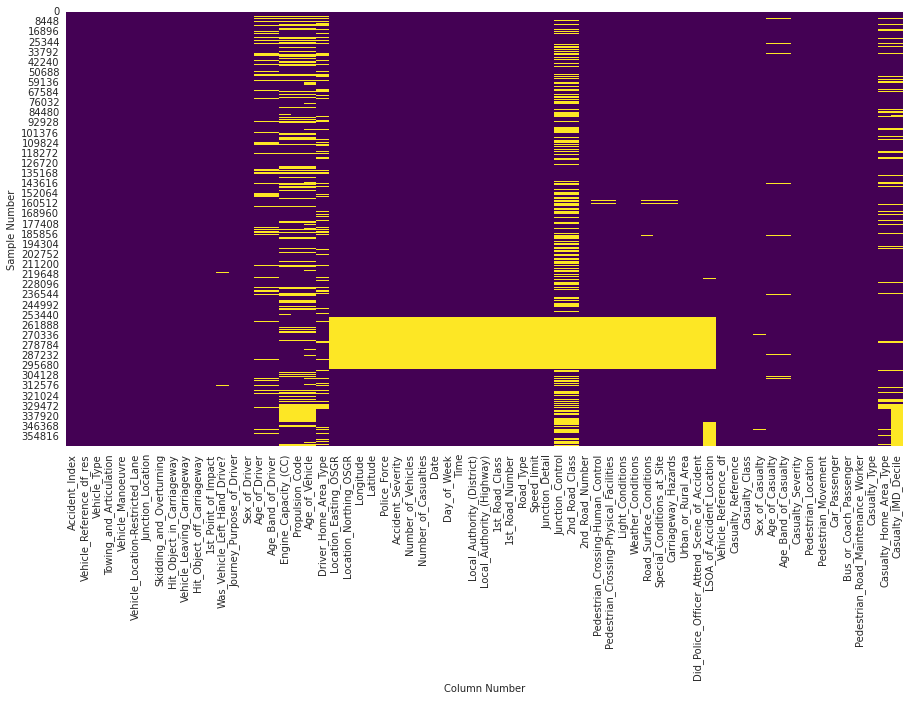

In [ ]:
# MISSING VALUES
df.isna()
df.isna().sum()

# Check for missing values in a single column
# df[df['Description'].isna()]

# List all rows that are missing a value in this field
# df.dropna(subset=['Description'])  

# Drop all rows that are missing a value in this field:
# df.dropna(subset=['Description'], inplace=True)

# b) Missing Values per Sample (Big Holes)


plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


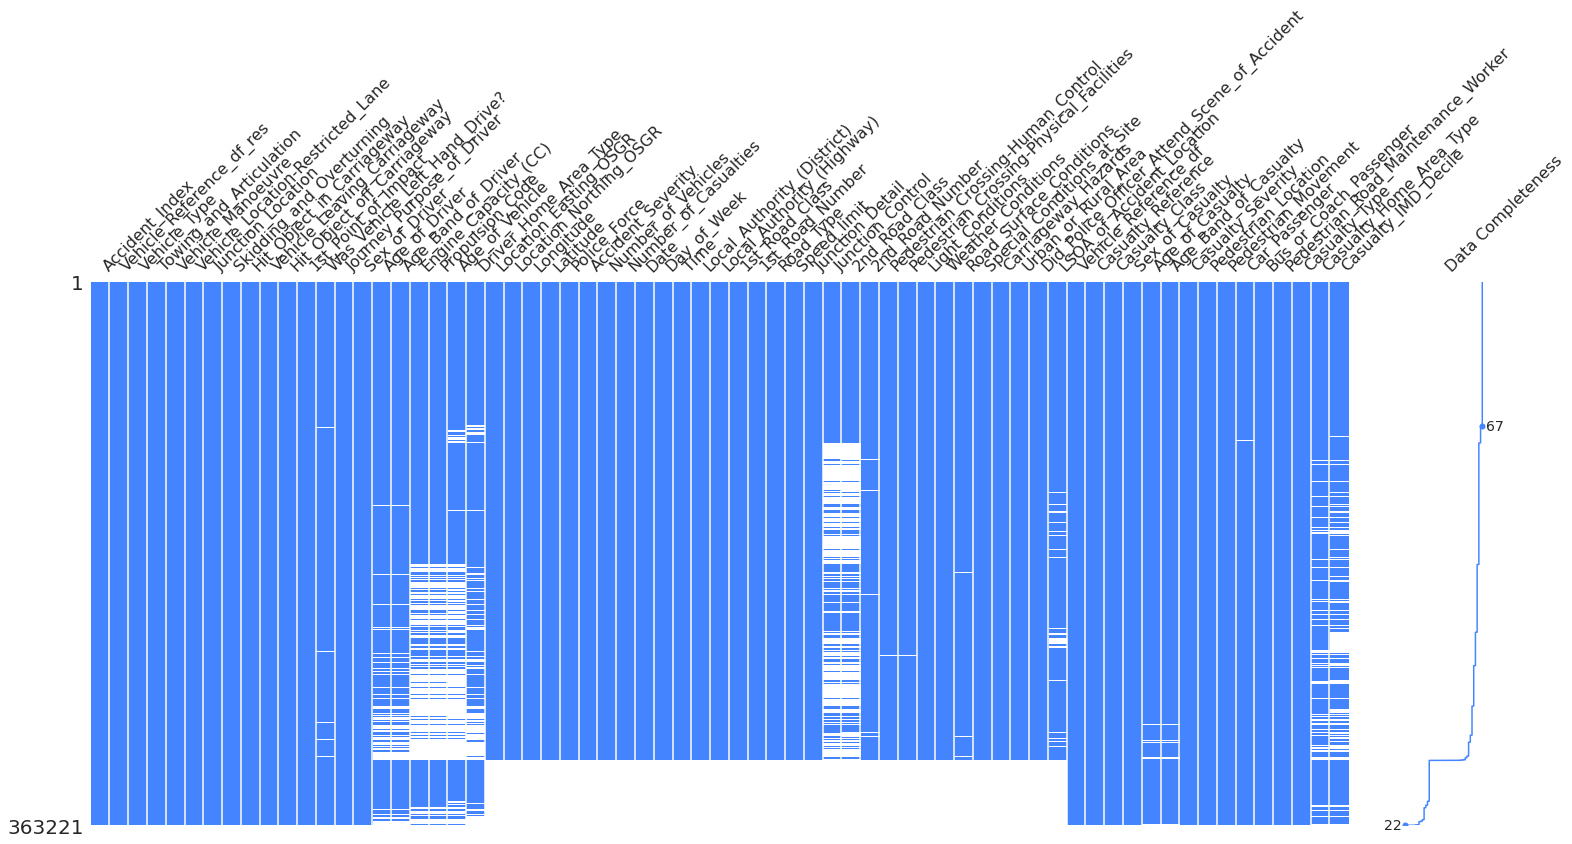

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
# Make a decision... drop rows that are 20% or more empty (you set the threshhold)
df = df.dropna(thresh=df.shape[1] * 0.80, axis = 0).reset_index(drop=True)
df.shape

(319790, 67)

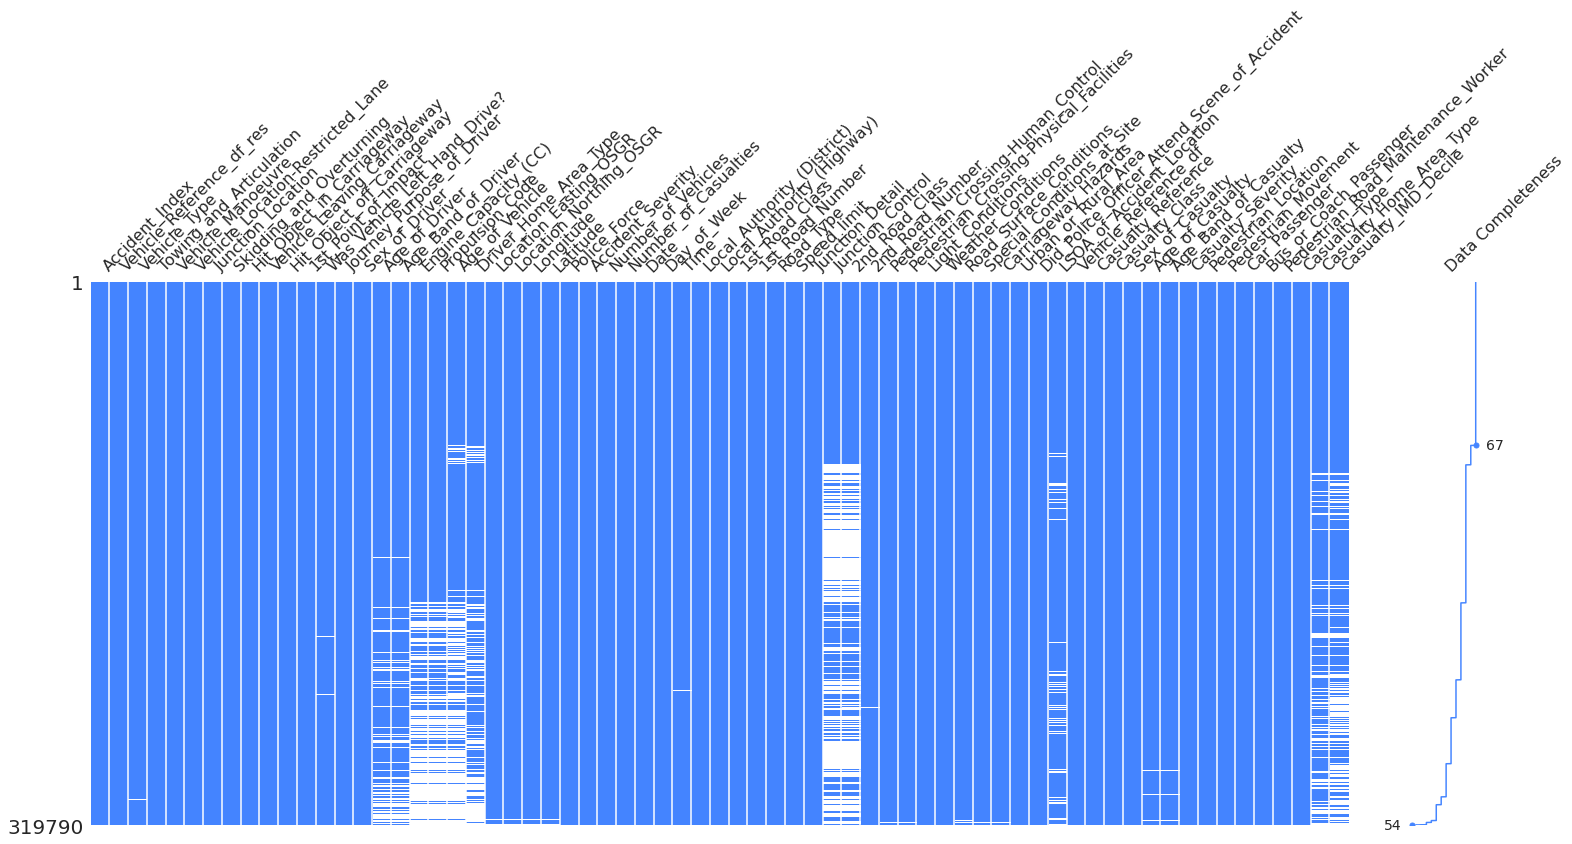

In [ ]:
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

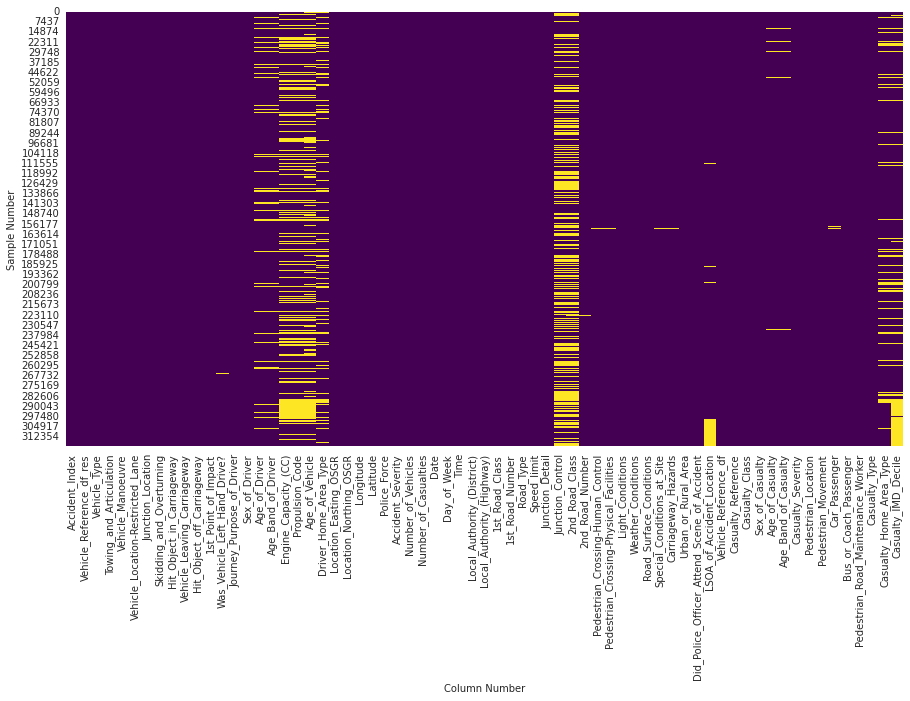

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

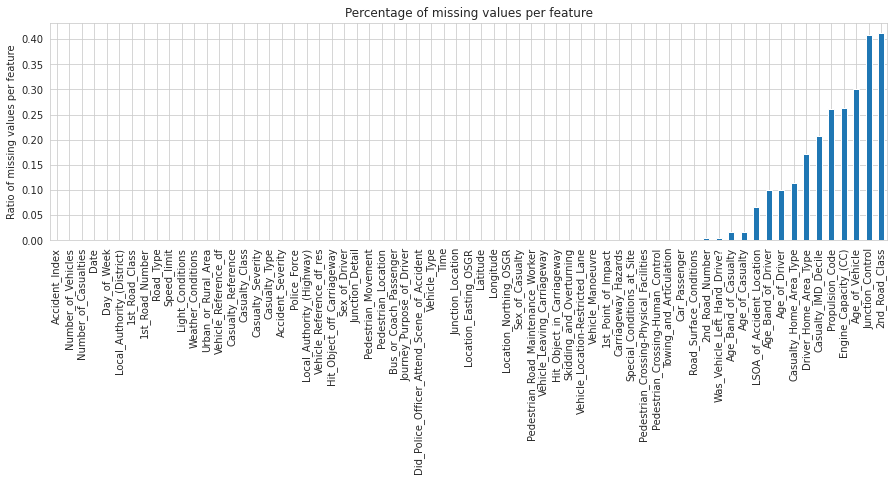

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
# drop any col that is more than 15% empty
df = df.dropna(thresh=df.shape[0] * 0.85,axis=1)
df.shape

(319790, 60)

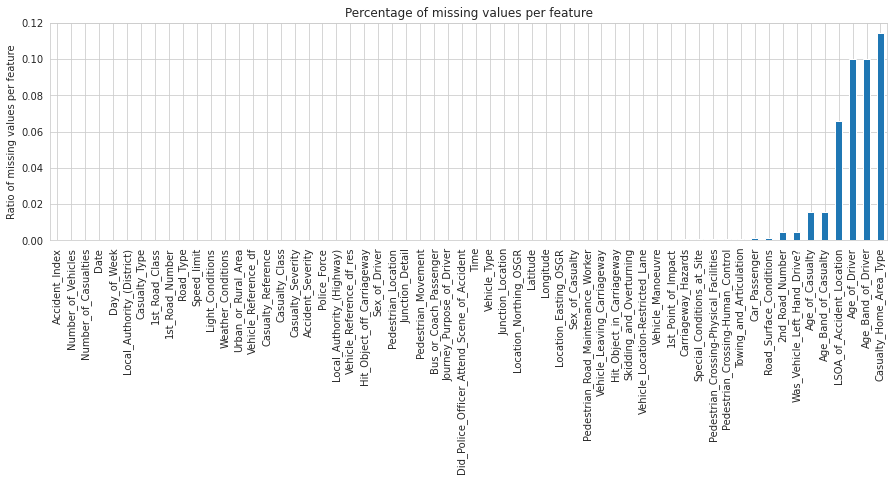

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

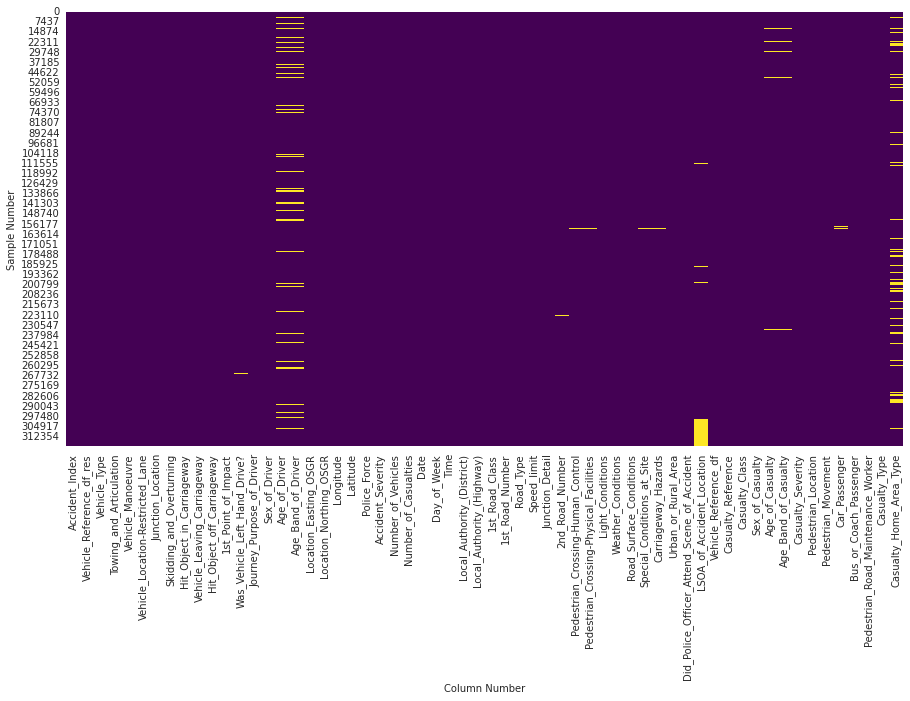

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [ ]:
df.to_csv("periodic_backup.csv")

In [ ]:
# d) Impute Values (Small Holes)
# df['CustomerID'].fillna('Missing', inplace=True)

# Replace NaN one column with the median
# df['col1'] = df['col1'].fillna(df['col1'].median())
# df = df.fillna(df.median())

# to see categorical encoding - see:  https://github.com/fenago/eda/blob/main/Cars_XGBoost.ipynb

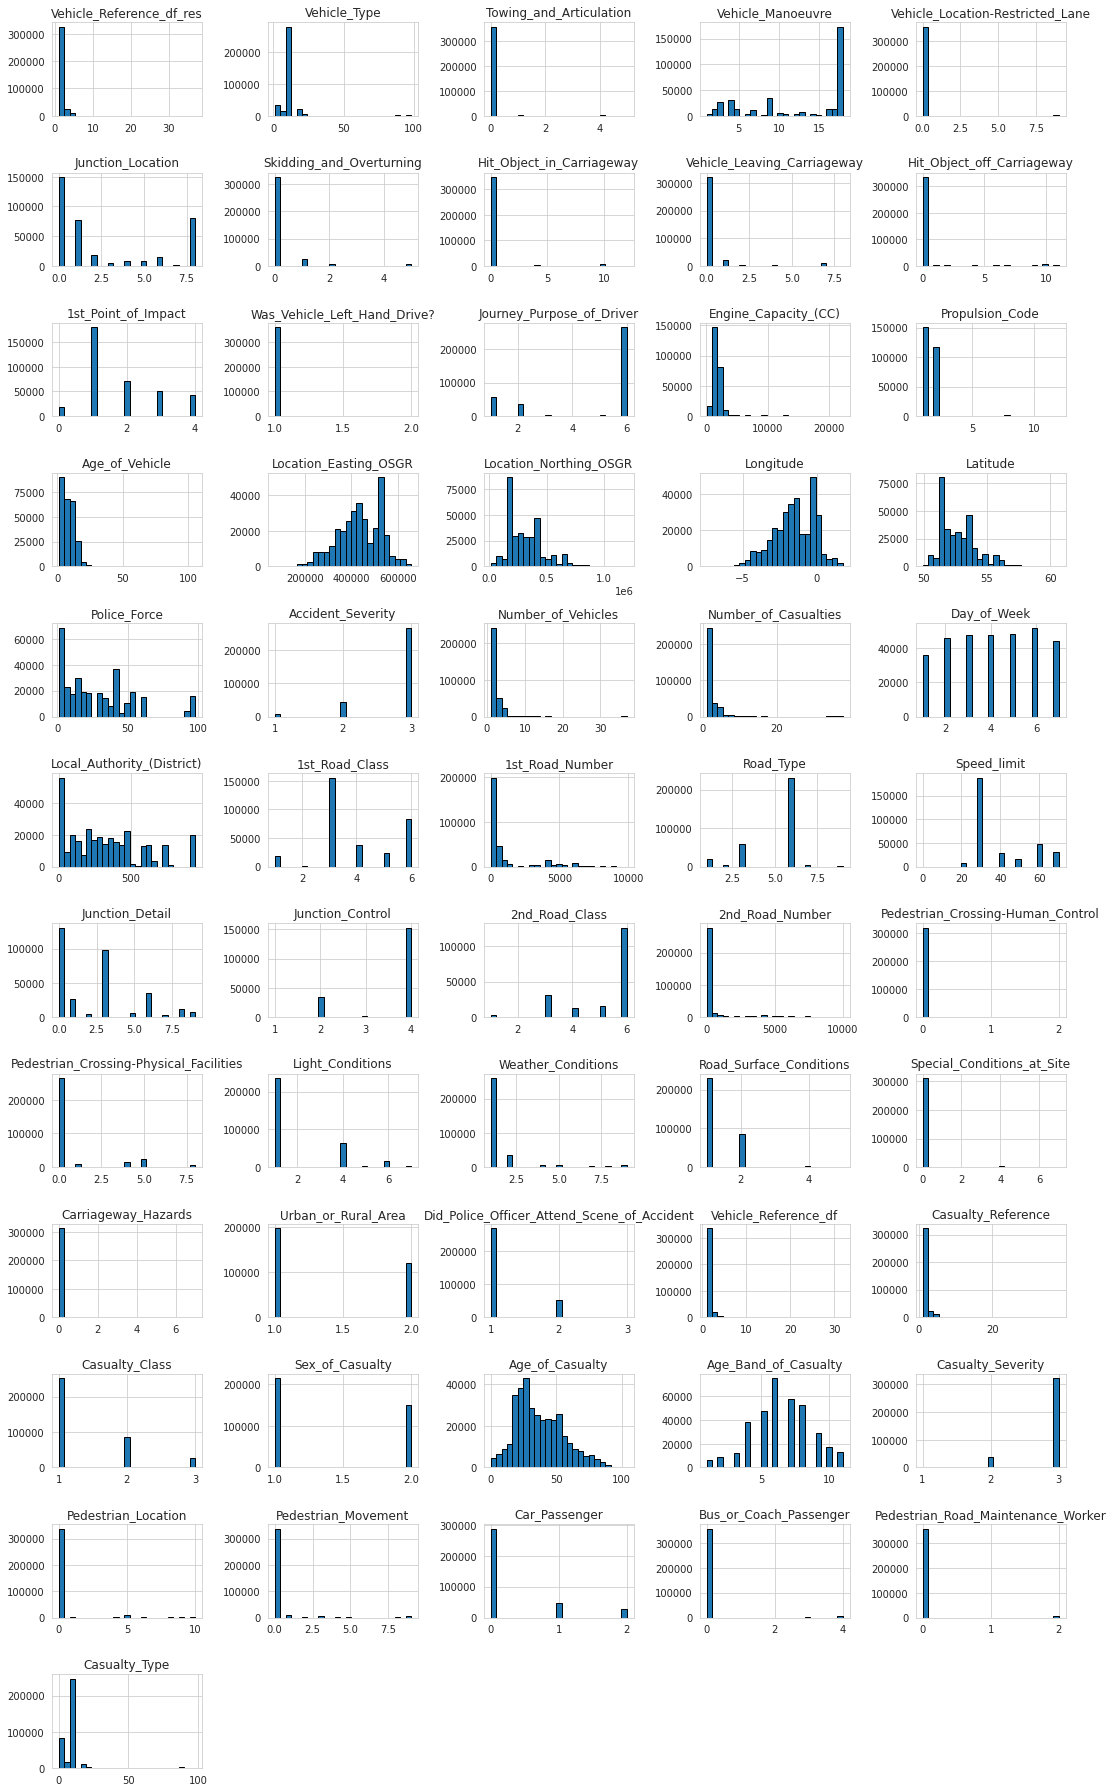

In [ ]:
# 4. Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

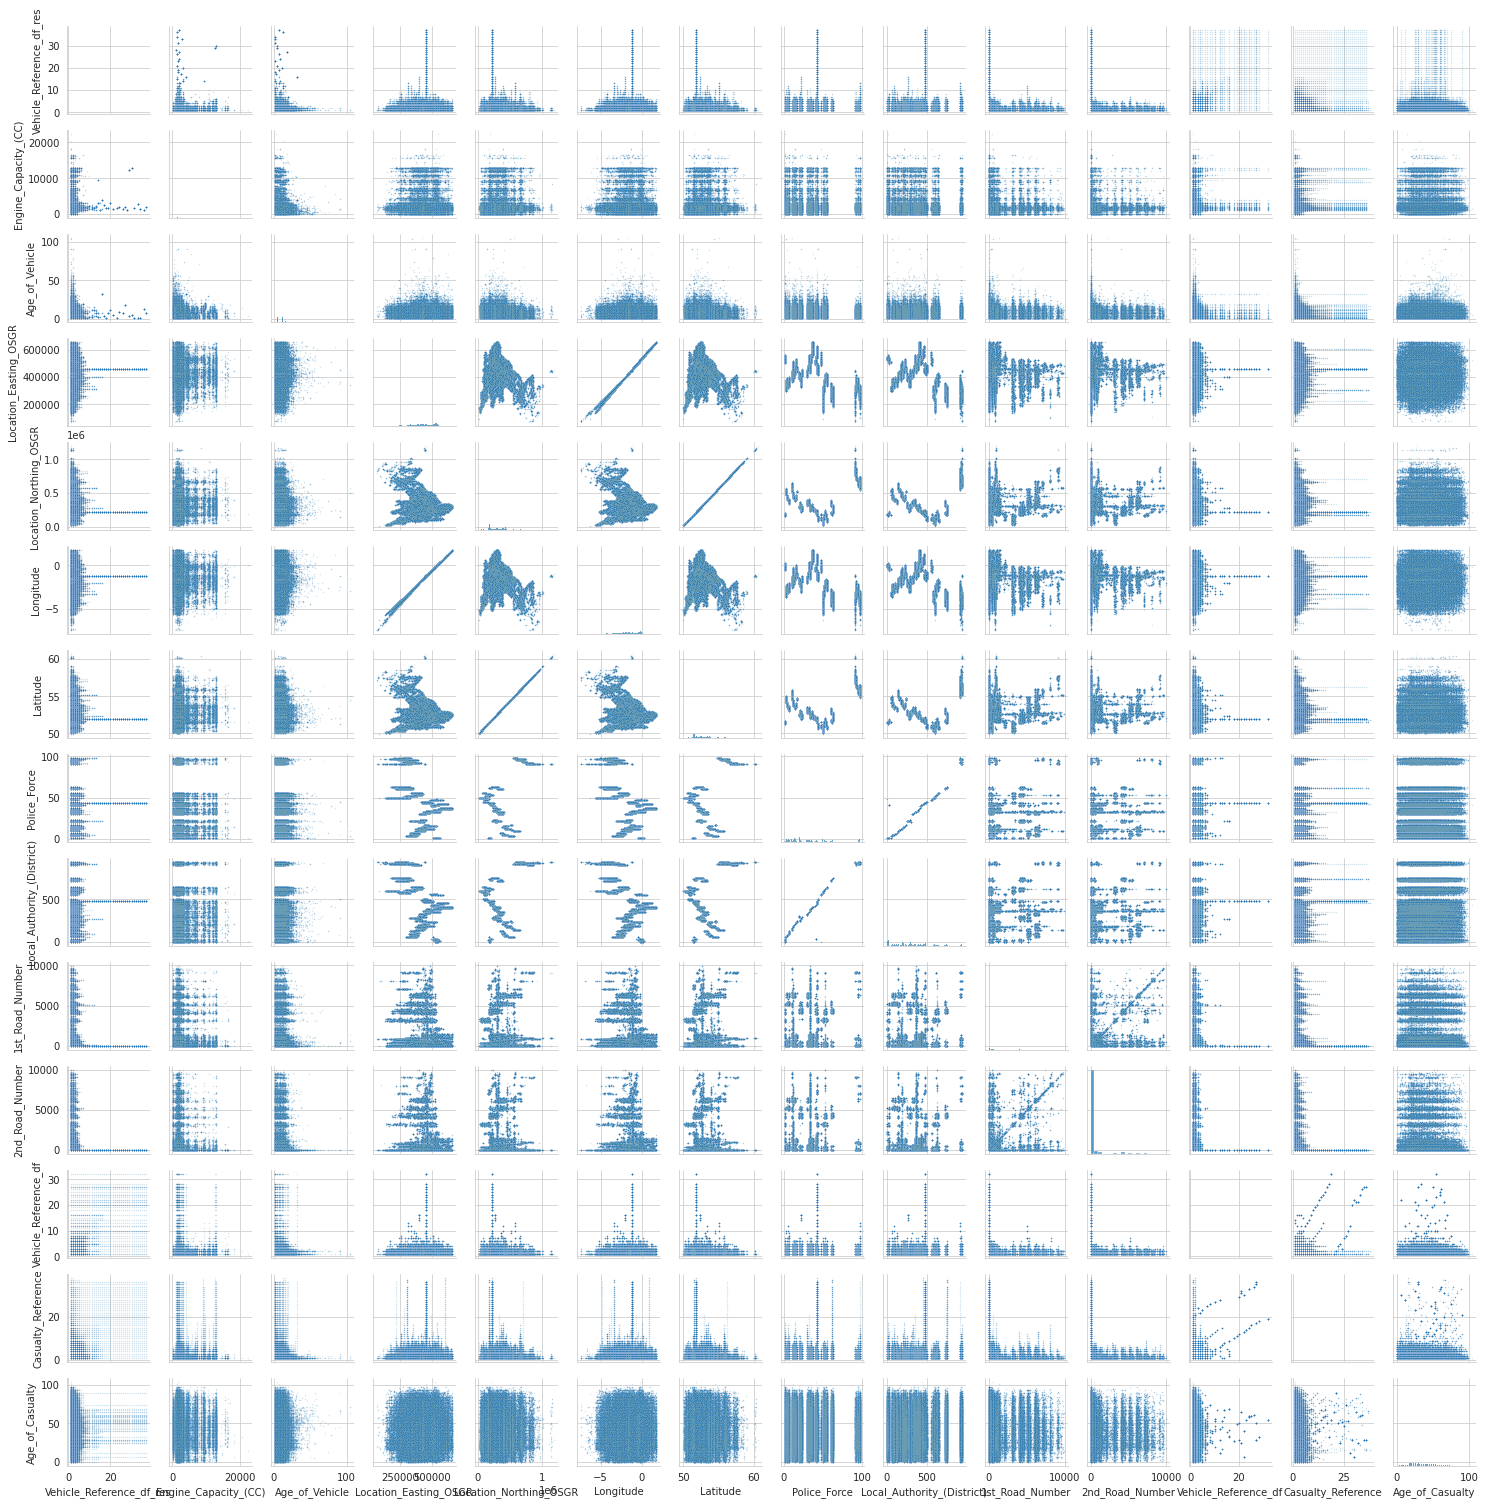

In [31]:
# b) Patterns
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});


In [ ]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df.corr(method="spearman") # pearson assumes a linear relationship... spearman does not

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)